Rebeca Durán Rodríguez Ejercicio 3

Tiempos de espera generados (minutos):
[ 9.12  9.07 11.57  8.88  9.47 13.07  9.19 10.75  9.01 14.49  9.76 15.27
  9.24 13.94  8.87 10.56  6.51  7.89  7.78 10.89 12.02  9.5   9.29 13.17
  8.07 10.3  13.26  8.28  6.63 12.42  9.94  9.74 11.27  7.13  9.48 13.56
  9.83  9.4   8.86  6.56  7.97 12.21 13.77 14.16  8.61  8.69  7.38 11.61
 10.85  8.03]


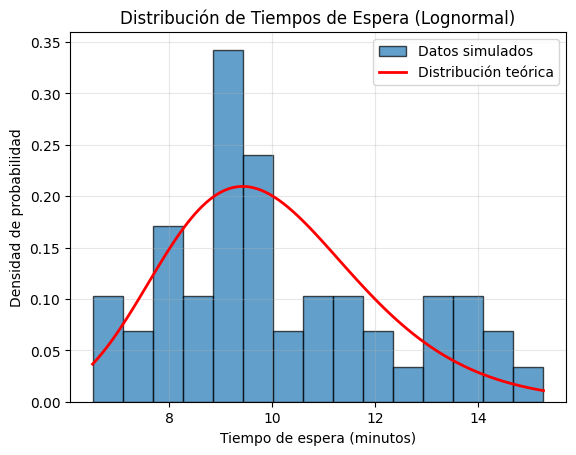


Tiempo total de espera acumulado: 507.3 minutos
Tiempo promedio por cliente: 10.1 minutos
Desviación estándar observada: 2.2 minutos


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Parámetros de la distribución lognormal
media_real = 10  # minutos (media de la espera)
desviacion_real = 2  # minutos (desviación estándar de la espera)

# Convertir a parámetros lognormales
sigma_log = np.sqrt(np.log(1 + (desviacion_real ** 2) / (media_real ** 2)))
mu_log = np.log(media_real) - 0.5 * sigma_log ** 2

# Generar 50 tiempos de espera lognormales
n_clientes = 50
U = np.random.uniform(0, 1, n_clientes)  # Uniformes para transformada inversa

# Transformación inversa para generar los tiempos de espera
Z = mu_log + sigma_log * stats.norm.ppf(U)  # Escala logarítmica
tiempos_espera = np.exp(Z)  # Convertir a escala real (minutos)

# Mostrar los resultados
print("Tiempos de espera generados (minutos):")
print(np.round(tiempos_espera, 2))

# Graficar el histograma y la densidad teórica de la distribución lognormal
plt.hist(tiempos_espera, bins=15, edgecolor='black', density=True, alpha=0.7, label='Datos simulados')

# Graficar la función teórica de densidad de la distribución lognormal
x = np.linspace(min(tiempos_espera), max(tiempos_espera), 100)
pdf = stats.lognorm.pdf(x, sigma_log, scale=np.exp(mu_log))
plt.plot(x, pdf, 'r-', lw=2, label='Distribución teórica')

# Añadir título y etiquetas
plt.title("Distribución de Tiempos de Espera (Lognormal)")
plt.xlabel("Tiempo de espera (minutos)")
plt.ylabel("Densidad de probabilidad")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Análisis de la cola de espera
tiempo_total = np.sum(tiempos_espera)
print(f"\nTiempo total de espera acumulado: {tiempo_total:.1f} minutos")
print(f"Tiempo promedio por cliente: {np.mean(tiempos_espera):.1f} minutos")
print(f"Desviación estándar observada: {np.std(tiempos_espera):.1f} minutos")

Conclusiones:
Modelado de incertidumbre: Las variables aleatorias permiten simular situaciones inciertas, como los tiempos de espera, proporcionando un modelo más realista que las distribuciones simples.

Simulación de fenómenos complejos: Las distribuciones lognormales ayudan a simular procesos con colas largas, comunes en tiempos de espera, lo que facilita el análisis de escenarios complejos.

Optimización de recursos: Ayudan a planificar recursos, como personal, en función de los tiempos de espera simulados, mejorando la eficiencia operativa.

Mejora de la experiencia del cliente: Permiten gestionar mejor los tiempos de espera y servicio, optimizando la atención y evitando tiempos de espera extremos.

Aplicabilidad en diversos contextos: Las simulaciones con variables aleatorias son útiles no solo en tiempos de espera, sino también en tiempos de servicio e inactividad, mejorando la eficiencia general.